In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Real_Original_Combine.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df.shape

(1093, 9)

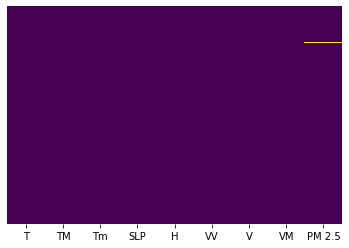

In [5]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df=df.dropna()

##  Univariate Analysis for all features

In [7]:

sns.set(rc={'figure.figsize':(11.7,8.27)})

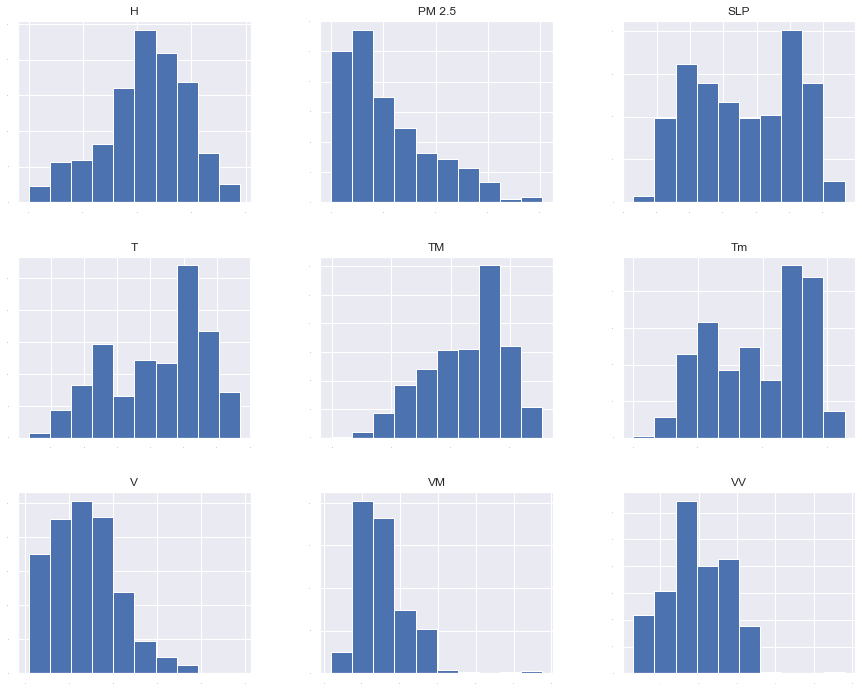

In [8]:
# Ploting histograms (Just to  check distribution of variables) for all the variables in one dataframe
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(15,12) )
plt.show()

In [9]:
#Checking Correlation :-
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


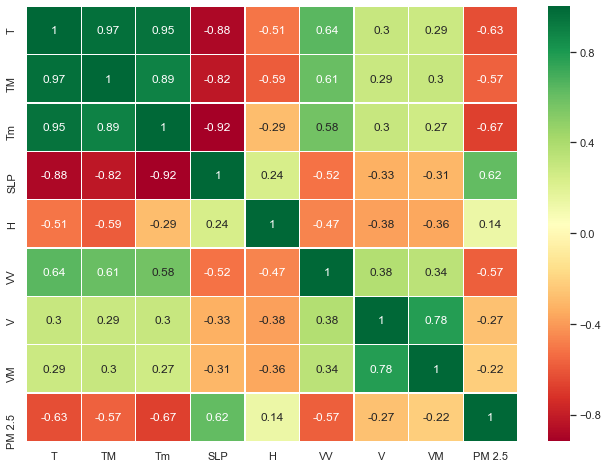

In [10]:
sns.heatmap(df.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

In [11]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [12]:
# Features importance 

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [13]:
print(model.feature_importances_)

[0.15375081 0.11168658 0.22062844 0.14199582 0.08722049 0.18712529
 0.05354619 0.04404638]


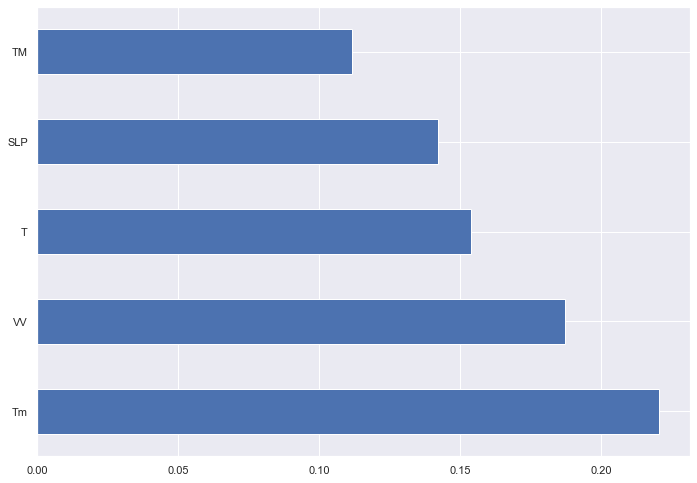

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


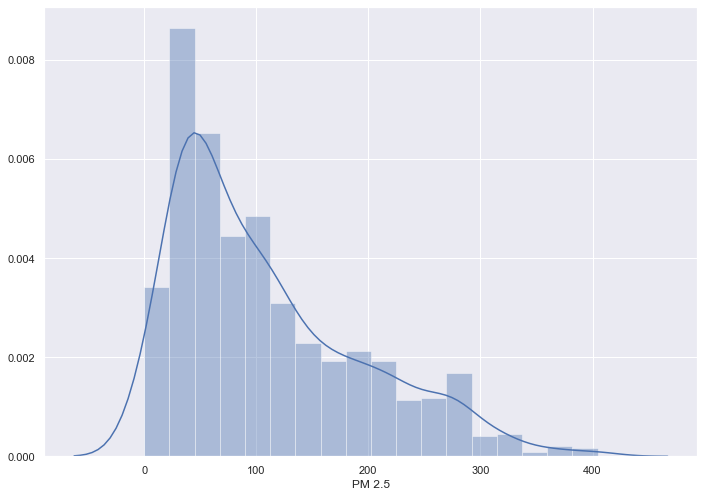

In [15]:

sns.distplot(y)

In [16]:
y.shape

(1092,)

In [17]:
X.shape

(1092, 8)

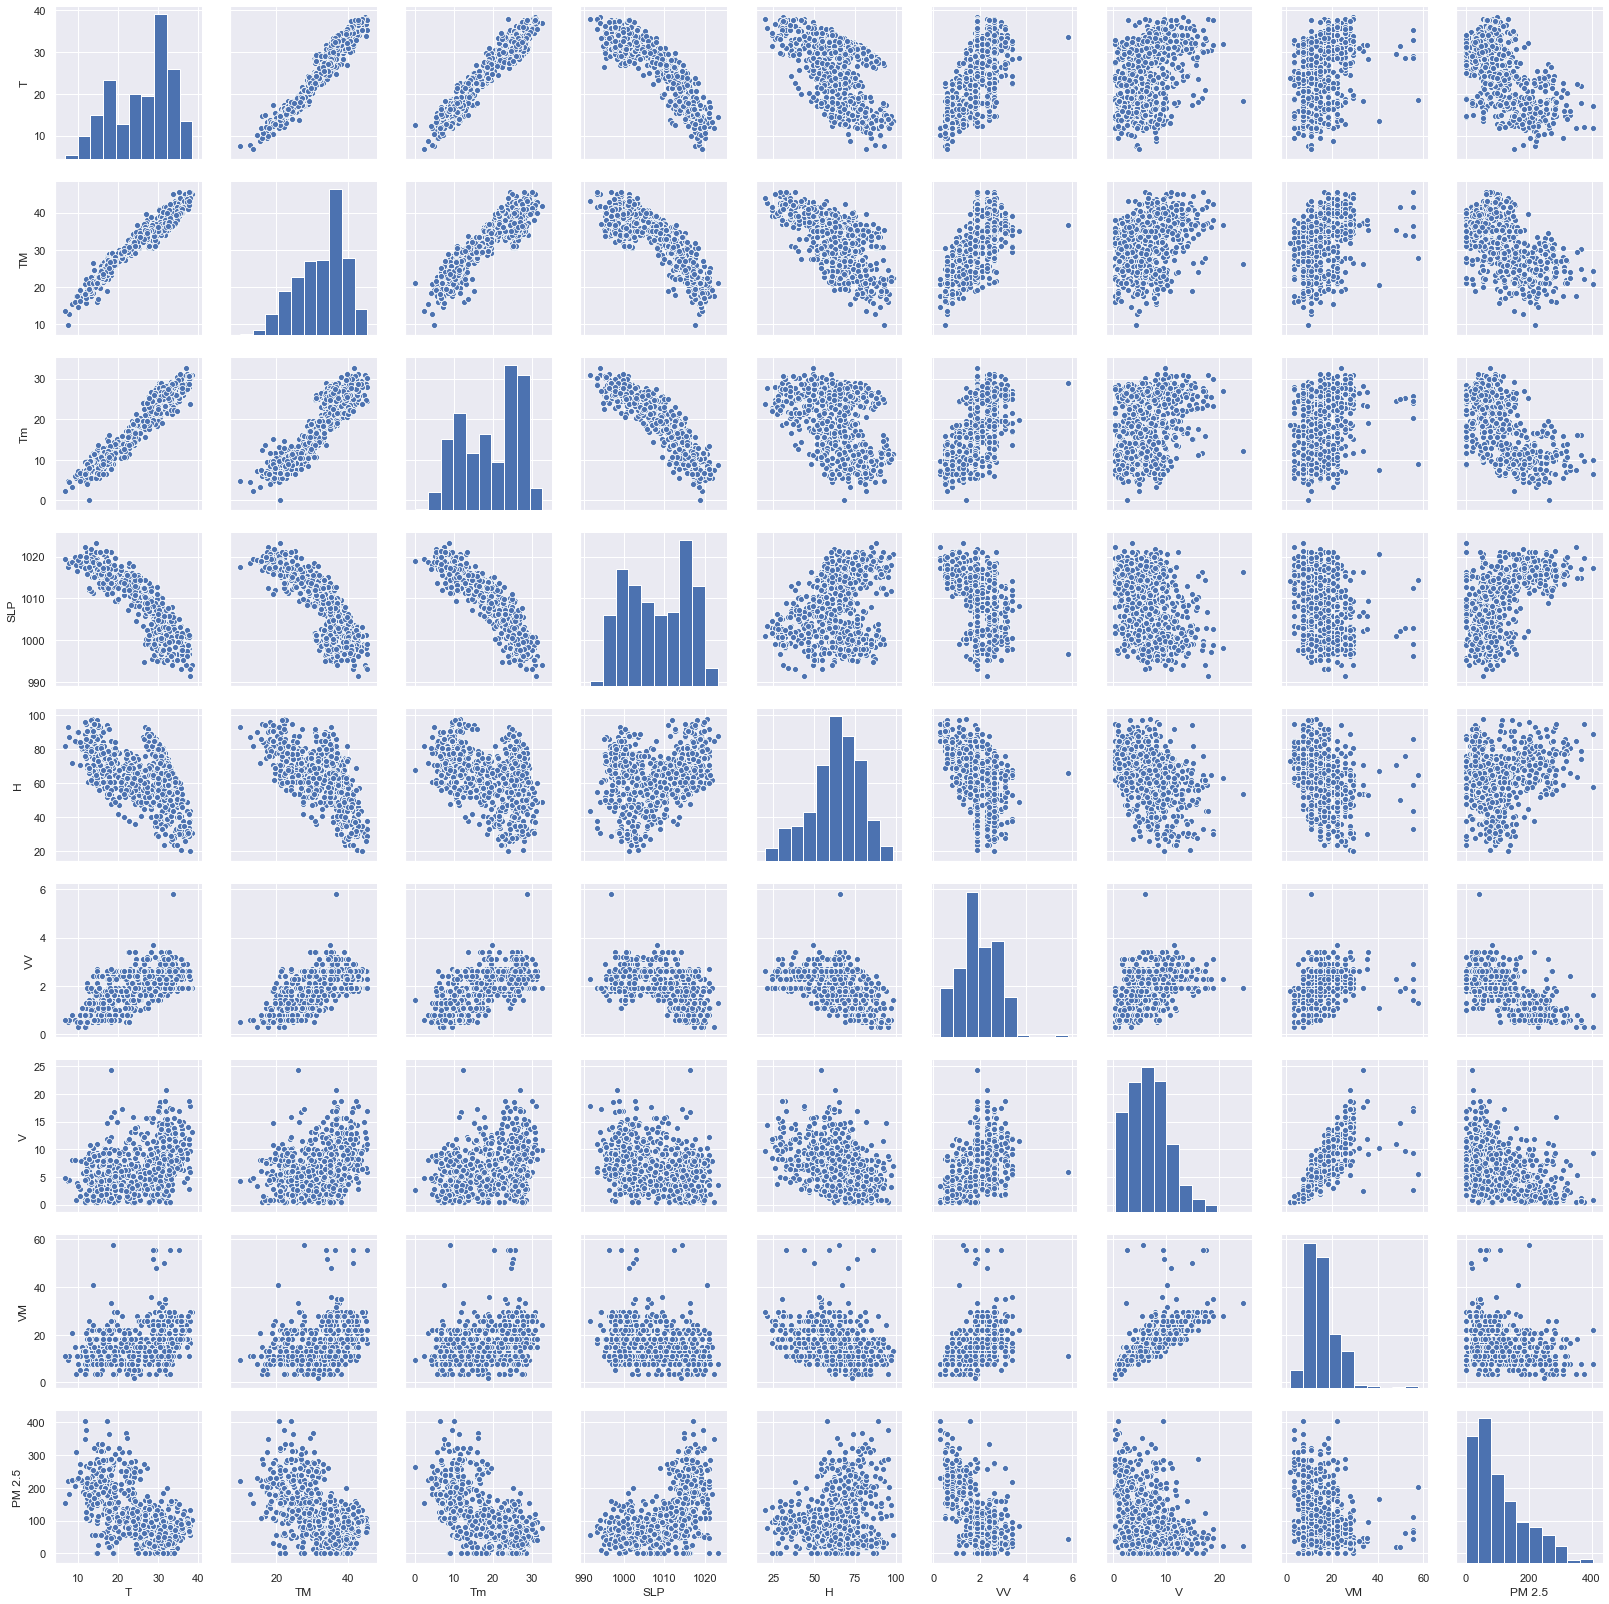

In [18]:
sns.pairplot(df)

#### From above pairplot we can see that Our data is not linearly separable hence we need to use algorithm which works fine on Non linearly separable datasets :-

#### But still we will apply Linear Regression (Just for experiment purpose)

In [19]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
regressor.coef_

array([ -2.69090829,   0.46219975,  -3.86705184,  -0.04494855,
        -1.21193616, -40.11490762,  -2.53563257,   0.56148181])

In [23]:

regressor.intercept_

448.1161696758882

In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.551516808175875


In [25]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.4852533130856789


In [26]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [27]:
score.mean()

0.4710569304807392

In [28]:
prediction=regressor.predict(X_test)

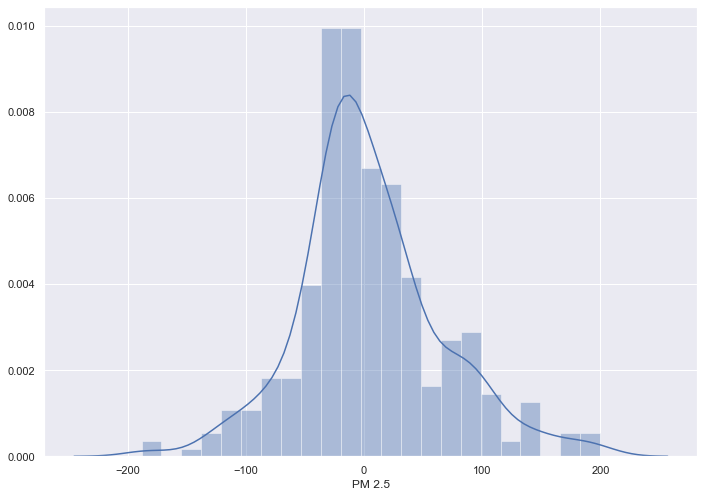

In [29]:
sns.distplot(y_test-prediction)

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 44.83624126628638
MSE: 3687.543030932419
RMSE: 60.725143317512384


In [32]:
# Decision Tree

In [33]:

from sklearn.tree import DecisionTreeRegressor

In [34]:
dtree=DecisionTreeRegressor(criterion="mse")

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [36]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [37]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))


Coefficient of determination R^2 <-- on test set: 0.6641784629804198


In [38]:
score=cross_val_score(dtree,X,y,cv=5)


In [39]:
score.mean()


0.4660832557401579

In [40]:
prediction=dtree.predict(X_test)

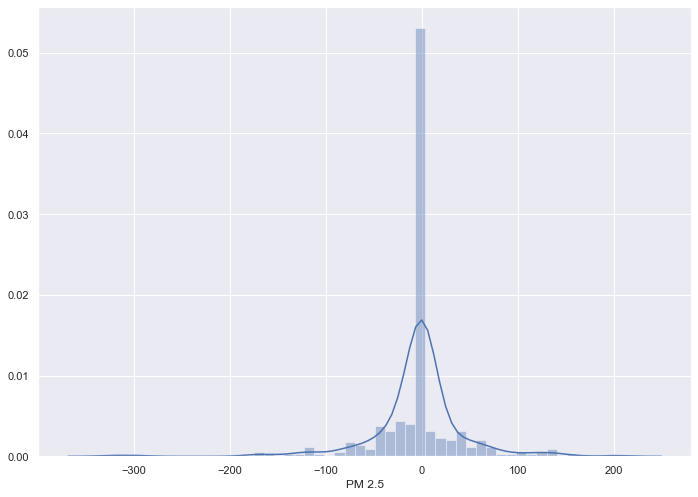

In [41]:
sns.distplot(y_test-prediction)


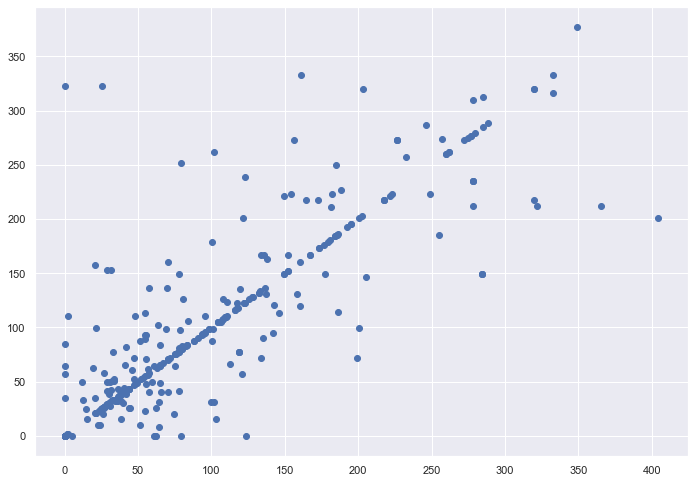

In [42]:
plt.scatter(y_test,prediction)


In [43]:
DecisionTreeRegressor()


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [45]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [46]:

random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [47]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [48]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 3380 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 6964 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 11572 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 17204 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 23860 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 31540 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 40244 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 49972 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 60724 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 72500 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 85300 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 99124 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 102400


 Time taken: 0 hours 4 minutes and 26.87 seconds.


In [49]:
random_search.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 70,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [50]:
random_search.best_score_

-3131.6489619178874

In [51]:
predictions=random_search.predict(X_test)

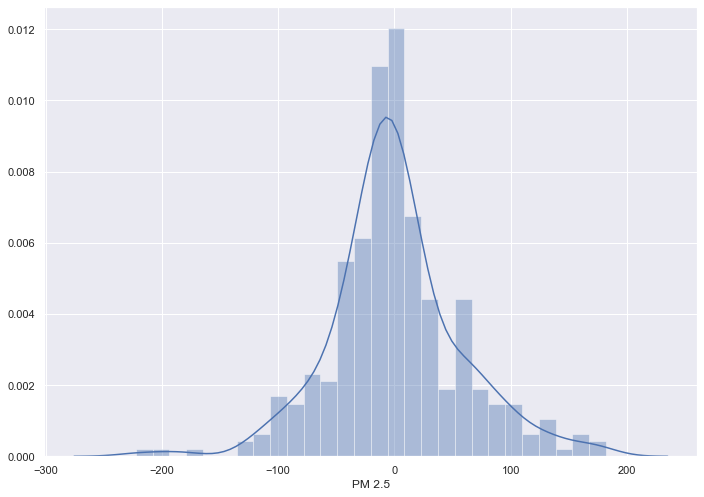

In [52]:
sns.distplot(y_test-predictions)

In [53]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.14163092473942
MSE: 3171.808145980198
RMSE: 56.31880810155874


In [54]:
# Random Forest :-

from sklearn.ensemble import RandomForestRegressor

In [55]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9719473864426559


In [57]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7888070985548221


In [58]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [59]:
score.mean()

0.735918858198018

In [60]:
# Random FOrest model Evaluation

prediction=regressor.predict(X_test)

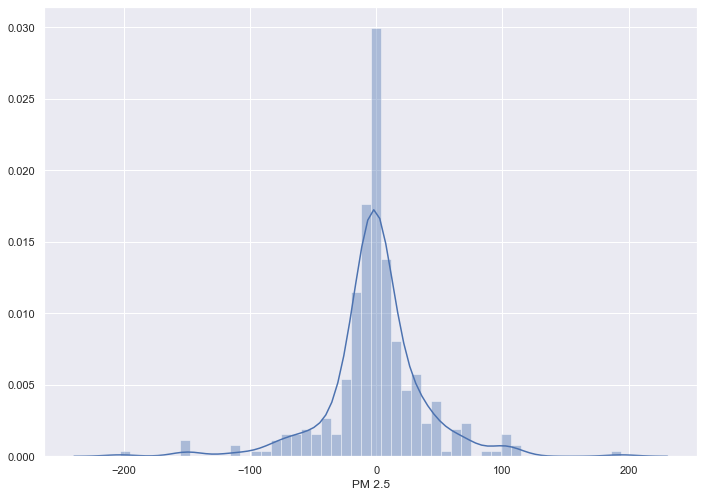

In [61]:
sns.distplot(y_test-prediction)


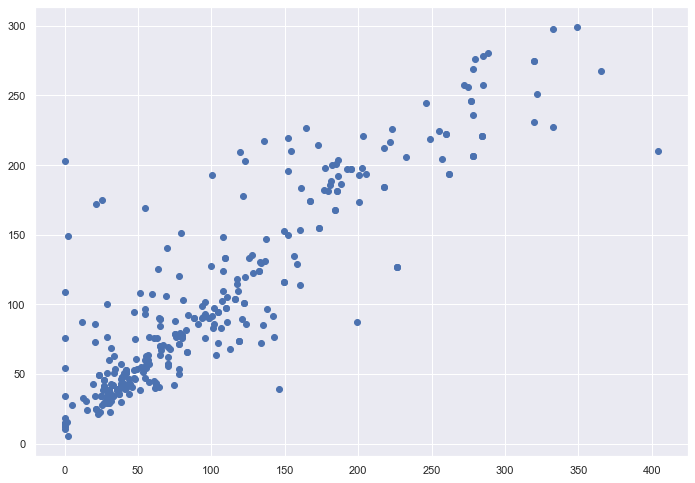

In [62]:
plt.scatter(y_test,prediction)


In [63]:
RandomForestRegressor()


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
from sklearn.model_selection import RandomizedSearchCV


In [65]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [66]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [67]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [68]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [69]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [70]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 10.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [71]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [72]:
rf_random.best_score_

-1550.6244701690814

In [73]:
predictions=rf_random.predict(X_test)

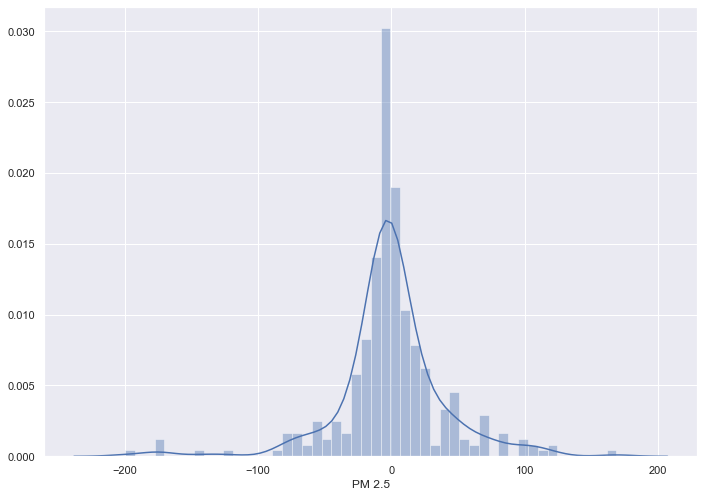

In [74]:
sns.distplot(y_test-predictions)

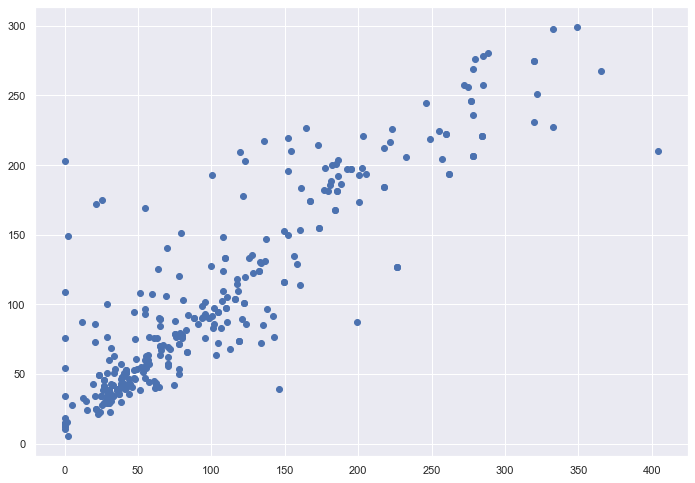

In [75]:

plt.scatter(y_test,prediction)

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24.83606429549991
MSE: 1654.4400464703833
RMSE: 40.67480849949245


In [77]:
# XGBoost Model

import xgboost as xgb

In [78]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

[12:56:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [79]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8606305938167513


In [80]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7210652962292528


In [81]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:56:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:56:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [82]:
score.mean()

0.6582827367763413

In [83]:
prediction=regressor.predict(X_test)

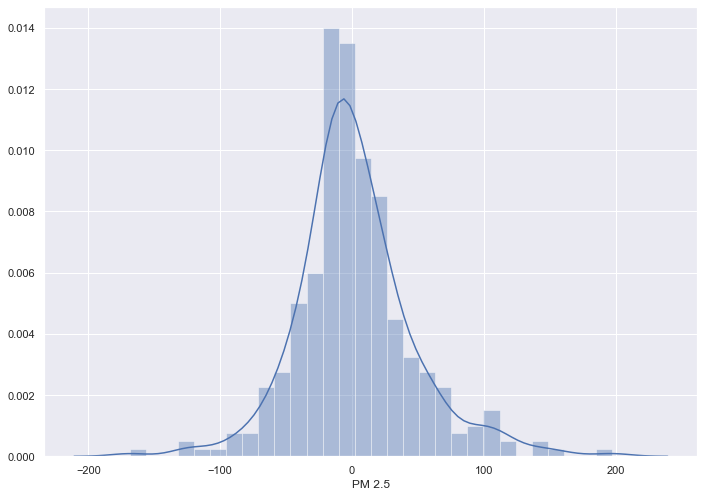

In [84]:
sns.distplot(y_test-prediction)

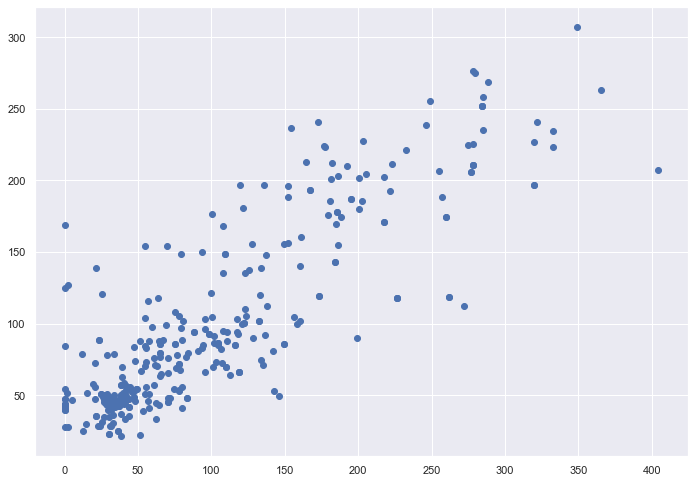

In [85]:
plt.scatter(y_test,prediction)

In [86]:
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [89]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [90]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [91]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [92]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [93]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:56:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:56:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:56:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:56:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:57:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[12:57:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[12:57:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[12:57:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[12:57:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[12:57:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[12:57:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[12:57:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[12:57:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[12:57:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[12:57:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.5s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[12:57:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[12:57:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[12:57:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[12:57:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[12:57:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[12:57:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[12:57:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[12:57:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[12:57:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[12:57:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[12:57:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[12:57:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[12:57:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[12:57:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[12:57:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[12:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[12:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[12:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[12:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[12:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.2s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[12:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[12:57:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[12:57:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[12:57:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[12:57:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[12:57:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[12:57:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[12:57:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[12:57:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[12:57:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[12:57:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[12:57:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[12:57:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[12:57:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[12:57:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[12:57:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[12:57:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   1.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[12:57:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   1.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[12:57:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   1.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[12:57:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[12:57:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[12:57:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[12:57:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[12:57:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[12:57:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[12:57:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[12:57:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[12:57:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[12:57:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[12:57:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[12:57:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[12:57:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[12:57:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[12:57:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[12:57:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[12:57:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[12:57:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[12:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[12:57:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[12:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[12:58:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[12:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.2s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[12:58:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.4s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[12:58:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.5s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[12:58:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.2s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[12:58:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[12:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[12:58:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[12:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[12:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[12:58:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   1.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[12:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[12:58:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[12:58:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[12:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[12:58:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[12:58:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[12:58:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[12:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[12:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[12:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[12:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[12:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[12:58:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[12:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[12:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.8s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[12:58:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.0s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[12:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.1s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[12:58:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[12:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[12:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[12:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[12:58:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[12:58:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[12:58:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[12:58:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.6s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[12:58:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[12:58:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.3s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[12:58:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.4s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[12:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[12:58:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   1.7s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[12:58:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   1.5s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[12:58:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   1.6s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[12:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   1.6s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[12:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   1.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[12:58:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[12:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[12:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[12:58:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   1.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[12:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[12:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[12:58:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[12:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[12:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[12:58:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[12:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[12:58:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[12:58:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[12:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[12:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[12:58:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   1.2s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[12:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   0.8s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[12:58:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[12:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   1.0s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[12:58:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   1.2s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[12:58:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   1.2s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[12:58:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   1.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[12:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   1.2s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[12:59:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   1.2s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[12:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[12:59:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[12:59:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[12:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[12:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[12:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[12:59:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[12:59:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   1.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[12:59:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   1.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[12:59:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   1.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[12:59:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   1.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[12:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[12:59:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[12:59:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[12:59:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[12:59:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[12:59:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[12:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[12:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[12:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[12:59:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[12:59:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[12:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[12:59:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[12:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[12:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.9s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[12:59:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[12:59:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[12:59:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[12:59:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[12:59:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[12:59:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.5s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[12:59:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.5s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[12:59:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.5s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[12:59:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.5s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[12:59:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[12:59:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[12:59:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[12:59:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[12:59:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[12:59:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[12:59:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.2s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[12:59:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.3s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[12:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.4s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[12:59:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.5s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[12:59:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[12:59:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[12:59:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[12:59:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[12:59:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[12:59:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[12:59:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[12:59:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[12:59:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[12:59:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[12:59:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[12:59:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[12:59:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[12:59:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[12:59:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[12:59:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[12:59:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[12:59:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[12:59:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[12:59:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[12:59:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[12:59:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[12:59:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[12:59:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[12:59:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[12:59:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[12:59:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[12:59:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[12:59:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[12:59:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:00:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.3s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[13:00:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   2.0s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[13:00:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   1.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[13:00:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   2.0s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[13:00:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   2.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[13:00:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   1.8s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:00:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   0.8s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:00:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:00:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.2s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:00:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.5s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:00:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   0.8s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[13:00:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[13:00:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[13:00:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[13:00:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[13:00:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:00:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.0s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:00:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:00:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:00:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:00:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.1s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:00:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:00:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:00:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:00:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:00:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:00:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.8s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:00:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   1.0s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:00:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:00:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   1.3s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:00:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   1.0s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:00:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:00:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:00:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:00:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:00:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[13:00:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[13:00:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[13:00:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[13:00:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[13:00:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[13:00:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[13:00:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[13:00:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[13:00:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[13:00:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[13:00:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[13:00:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[13:00:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[13:00:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[13:00:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:00:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:00:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:00:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:00:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:00:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[13:00:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[13:00:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[13:00:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[13:00:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[13:00:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:00:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:01:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:01:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:01:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:01:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[13:01:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[13:01:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[13:01:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[13:01:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[13:01:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:01:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:01:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:01:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:01:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:01:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[13:01:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[13:01:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[13:01:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[13:01:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[13:01:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[13:01:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.1s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[13:01:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.0s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[13:01:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.2s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[13:01:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[13:01:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:01:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:01:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:01:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:01:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:01:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[13:01:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   1.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[13:01:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   1.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[13:01:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   1.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[13:01:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   1.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[13:01:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   1.7s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:01:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:01:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:01:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:01:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:01:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.1s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[13:01:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[13:01:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[13:01:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[13:01:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[13:01:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[13:01:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[13:01:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[13:01:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[13:01:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[13:01:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[13:01:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[13:01:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[13:01:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[13:01:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[13:01:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[13:01:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[13:01:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[13:01:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[13:01:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[13:01:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[13:01:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[13:01:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[13:01:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[13:01:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[13:01:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:01:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.0s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:01:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.0s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:01:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.1s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:01:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.0s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:01:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:01:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:01:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:01:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:01:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:01:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[13:01:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[13:01:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[13:01:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[13:01:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[13:02:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   0.8s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:02:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:02:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:02:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:02:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:02:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:02:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:02:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:02:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:02:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:02:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[13:02:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[13:02:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[13:02:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[13:02:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[13:02:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:02:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:02:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:02:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:02:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:02:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[13:02:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.5s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[13:02:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.5s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[13:02:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.5s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[13:02:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.5s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[13:02:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[13:02:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[13:02:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[13:02:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[13:02:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[13:02:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[13:02:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[13:02:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[13:02:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[13:02:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[13:02:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[13:02:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[13:02:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[13:02:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[13:02:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[13:02:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:02:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:02:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:02:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:02:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:02:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:02:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.7s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:02:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.7s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:02:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.7s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:02:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.7s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:02:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.7s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[13:02:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.7s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[13:02:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.7s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[13:02:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.7s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[13:02:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.7s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[13:02:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[13:02:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[13:02:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[13:02:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[13:02:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[13:02:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:02:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:02:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:02:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:02:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:02:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[13:02:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.4s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[13:02:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[13:02:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.4s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[13:02:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.6s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[13:02:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[13:02:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[13:02:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[13:02:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[13:02:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[13:02:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[13:02:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[13:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.7s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[13:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[13:02:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[13:02:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[13:02:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[13:02:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   1.0s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[13:02:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[13:02:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[13:02:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.6s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:02:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:02:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:02:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:02:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:02:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[13:02:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[13:02:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[13:02:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[13:02:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[13:02:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:02:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:02:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:02:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:02:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:02:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[13:02:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[13:03:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[13:03:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[13:03:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[13:03:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:03:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:03:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:03:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:03:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:03:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[13:03:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[13:03:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[13:03:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[13:03:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[13:03:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.1s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:03:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:03:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   1.0s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:03:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:03:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.8s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:03:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:03:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:03:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:03:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:03:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:03:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:03:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:03:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:03:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.7s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:03:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   2.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:03:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.6s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:03:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:03:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:03:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:03:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:03:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[13:03:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[13:03:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[13:03:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[13:03:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[13:03:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   0.9s
[13:03:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.7min finished
/opt/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                            

In [94]:

xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [95]:

xg_random.best_score_

-1380.5446667169047

In [96]:
predictions=xg_random.predict(X_test)

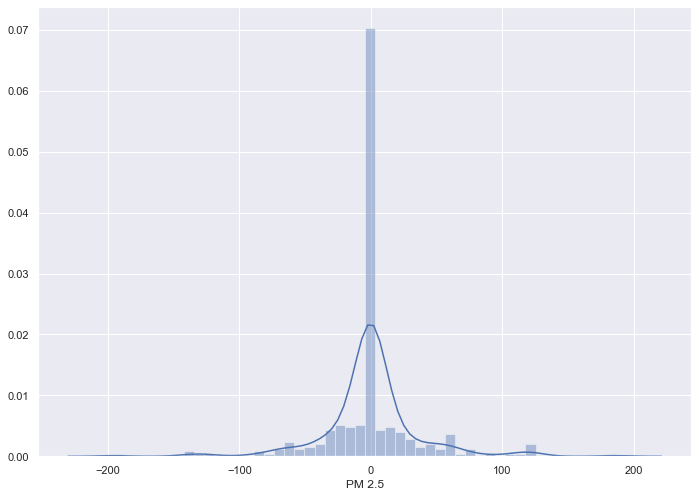

In [97]:

sns.distplot(y_test-predictions)

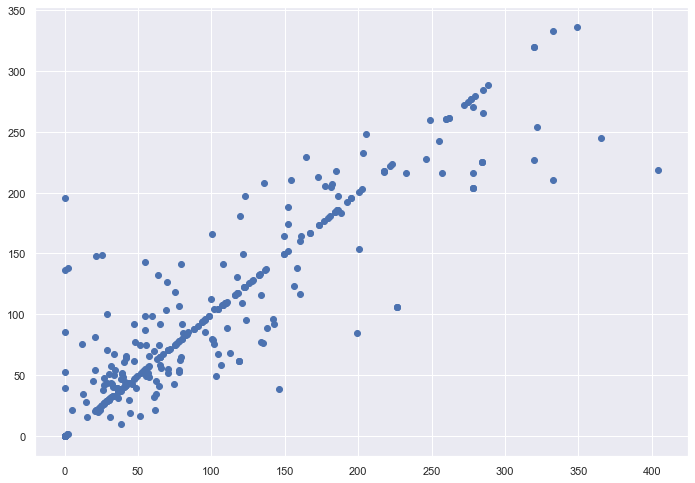

In [98]:

plt.scatter(y_test,predictions)


### Regression Evaluation Metrics¶
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [99]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19.02743707274397
MSE: 1355.708107839994
RMSE: 36.8199417142395


In [100]:
import pickle

In [101]:

# open a file, where you ant to store the data
file = open('XGBoost_model.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)